In [1]:
import ROOT
import os

Welcome to JupyROOT 6.22/02


In [2]:
v0_dir = "/work/gallim/root_files/vertex_investigation/VertexInvestigation_vtx0"
v0_tmpl = "/work/gallim/root_files/vertex_investigation/VertexInvestigation_vtx0/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8_storeWeights_alesauva-UL2018_0-10_6_4-v0-RunIISummer19UL18MiniAOD-106X_upgrade2018_realistic_v11_L1v1-v1-3f96409841a3cc85b911eb441562baae_USER_{}.root"
tree_name = "diphotonDumper/trees/ggH_125_13TeV_All_$SYST"

In [3]:
chain = ROOT.TChain()

In [4]:
for fl in os.listdir(v0_dir):
    chain.Add("{}/{}/{}".format(v0_dir, fl, tree_name))

In [5]:
rdf = ROOT.RDataFrame(chain)

In [6]:
cut = "max(abs(lead_eta), abs(sublead_eta)) < 1.5"

rdf_cut = rdf.Filter(cut)

In [7]:
mass_arr = rdf_cut.Take[float]('mass').GetValue()

In [8]:
len(mass_arr)

633111

In [9]:
from array import array
mass_empt = array('d', [ 0. ])
cut_tree = ROOT.TTree("cut_tree", "cut_tree")
cut_tree.Branch("mass", mass_empt, "mass/D")
for ev in mass_arr:
    mass_empt[0] = ev
    cut_tree.Fill()

In [10]:
mass = ROOT.RooRealVar("mass", "Invariant mass", 125, 115, 135)
mu1 = ROOT.RooRealVar("mu1", "mu1", 125, 120, 135)
sigma1 = ROOT.RooRealVar("sigma1", "sigma1", 1, 0.1, 10)
mu2 = ROOT.RooRealVar("mu2", "mu2", 125, 100, 140)
sigma2 = ROOT.RooRealVar("sigma2", "sigma2", 4, 0.1, 10)
alpha = ROOT.RooRealVar("alpha", "alpha", 1, 0, 20)
n = ROOT.RooRealVar("n", "n", 1, 0, 5)

frac = ROOT.RooRealVar("frac", "frac", 0.5, 0., 1.)

gauss1 = ROOT.RooGaussian("gauss1", "gauss1", mass, mu1, sigma1)
cb = ROOT.RooCBShape("cb", "cb", mass, mu2, sigma2, alpha, n)

model = ROOT.RooAddPdf("model", "model", ROOT.RooArgList(gauss1, cb), ROOT.RooArgList(frac))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [11]:
# Get values
#lead_eta = ROOT.RooRealVar("lead_eta", "lead_eta", 0, -3, 3)
#sublead_eta = ROOT.RooRealVar("sublead_eta", "sublead_eta", 0, -3, 3)

#cut = ROOT.RooFormulaVar("EBEB", "max(abs(x[0]), abs(x[0])) < 1.5", ROOT.RooArgList(lead_eta, sublead_eta)) #cut for EBEB category

data = ROOT.RooDataSet("data", "data", chain, ROOT.RooArgSet(mass))
data_ebeb = ROOT.RooDataSet("data_ebeb", "data_ebeb", cut_tree, ROOT.RooArgSet(mass))

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #34 because mass cannot accommodate the value 114.08
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #69 because mass cannot accommodate the value 90.1501
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #105 because mass cannot accommodate the value 56.4725
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #129 because mass cannot accommodate the value 621.866
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 17522 out-of-range events
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data_ebeb) Skipping event #23 because mass cannot accommodate the value 114.08
[#1] INFO:DataHandling -- RooTreeDataStore::loadVal

In [13]:
%%time

# Fit in subrange
mass.setRange("higgs", 120, 130)
fit_result = model.fitTo(data, ROOT.RooFit.Range("higgs"), ROOT.RooFit.Save(1))

CPU times: user 1min 16s, sys: 6.65 s, total: 1min 23s
Wall time: 1min 14s
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'higgs' created with bounds [120,130]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named higgs
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'NormalizationRangeForhiggs' created with bounds [115,135]
[#1] INFO:Eval -- RooRealVar::setRange(mass) new range named 'fit_nll_model_data' created with bounds [120,130]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss1,cb)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO

In [131]:
# Plot Decoration
mass_frame = mass.frame(ROOT.RooFit.Title("Mass"))
mass_frame.GetYaxis().SetTitleOffset(1.6)
data.plotOn(mass_frame)
#cb.plotOn(mass_frame, ROOT.RooFit.LineColor(ROOT.kOrange))
#gauss1.plotOn(mass_frame, ROOT.RooFit.LineColor(ROOT.kPink))
model.plotOn(mass_frame, ROOT.RooFit.LineColor(ROOT.kRed))
model.plotOn(mass_frame, ROOT.RooFit.Components("cb"), ROOT.RooFit.LineColor(ROOT.kPink))
model.plotOn(mass_frame, ROOT.RooFit.Components("gauss1"), ROOT.RooFit.LineColor(ROOT.kCyan))
chi_sq = mass_frame.chiSquare() / model.getParameters(data).getSize()
model.paramOn(mass_frame, ROOT.RooFit.Layout(0.65), ROOT.RooFit.Label("chiSq / ndof = {:.5f}".format(chi_sq)))
data.statOn(mass_frame, ROOT.RooFit.Layout(0.46, 0.12, 0.95))

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.setStringAttribute("fitrange", nullptr);
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.setString

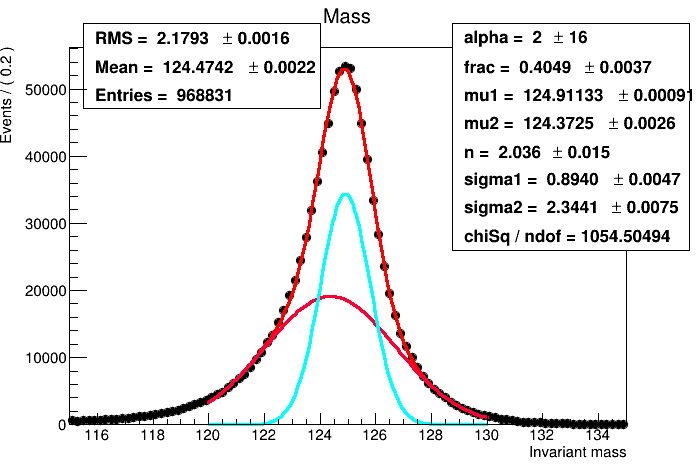

In [132]:
c = ROOT.TCanvas("", "")
mass_frame.Draw()
c.Draw()
#c.SaveAs("/eos/home-g/gallim/www/plots/Hgg/VertexInvestigation/no_cat_roofit.png")
#c.SaveAs("/eos/home-g/gallim/www/plots/Hgg/VertexInvestigation/no_cat_roofit.pdf")

In [94]:
pars = model.getParameters(data)

In [97]:
pars = list(pars)

In [102]:
pars[0].getVal()

2.1792893131811564

In [107]:
data.sigma(mass) / data.mean(mass)

0.017507834170554203

In [105]:
data.sigma(mass)

2.1792728029205612

In [108]:
pars

In [112]:
parameters = {v.GetName(): v.getVal() for v in pars}

In [113]:
parameters

{'alpha': 2.1792893131811564,
 'frac': 0.4049250985159446,
 'mu1': 124.91132735734017,
 'mu2': 124.3725309995852,
 'n': 2.0362863306452943,
 'sigma1': 0.8939994029450327,
 'sigma2': 2.344061335765624}

In [121]:
ROOT.RooFit.Components(cb)

In [126]:
cb.getVal()

0.964806699831464

In [12]:
ROOT.RooFit.Save

In [16]:
cov_mat = fit_result.covarianceMatrix()

In [30]:
cov_mat.Print()


7x7 matrix is as follows

     |      0    |      1    |      2    |      3    |      4    |
----------------------------------------------------------------------
   0 |     0.1168    0.000652  -6.842e-06  -2.331e-05       0.262 
   1 |   0.000652   1.299e-05  -2.648e-06  -1.027e-05    0.002432 
   2 | -6.842e-06  -2.648e-06   7.323e-06  -7.385e-07  -2.706e-05 
   3 | -2.331e-05  -1.027e-05  -7.385e-07   2.852e-05   -9.36e-05 
   4 |      0.262    0.002432  -2.706e-05   -9.36e-05       2.925 
   5 |  2.667e-05   1.089e-05  -3.403e-06  -1.208e-05   0.0001048 
   6 |  4.796e-05   1.981e-05  -6.609e-06  -2.526e-05   0.0001936 


     |      5    |      6    |
----------------------------------------------------------------------
   0 |  2.667e-05   4.796e-05 
   1 |  1.089e-05   1.981e-05 
   2 | -3.403e-06  -6.609e-06 
   3 | -1.208e-05  -2.526e-05 
   4 |  0.0001048   0.0001936 
   5 |  1.696e-05   2.275e-05 
   6 |  2.275e-05   5.677e-05 



In [39]:
a = cov_mat.GetMatrixArray()

In [55]:
a[7]

0.000652025765455239

In [69]:
cov_mat[1][1]

1.2988366061597379e-05